In [17]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, auc

In [2]:
data1=pd.read_csv('C:/Users/a121014/Downloads/titanic.csv')
data1['Pclass'] = data1['Pclass'].astype('object')
#print(data1.info())

data2=data1.drop('Name', axis=1)

data3 = pd.get_dummies(data2)
print(data3.info())
#data2.head()


#data1.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 10 columns):
Survived                   887 non-null int64
Age                        887 non-null float64
Siblings/Spouses Aboard    887 non-null int64
Parents/Children Aboard    887 non-null int64
Fare                       887 non-null float64
Pclass_1                   887 non-null uint8
Pclass_2                   887 non-null uint8
Pclass_3                   887 non-null uint8
Sex_female                 887 non-null uint8
Sex_male                   887 non-null uint8
dtypes: float64(2), int64(3), uint8(5)
memory usage: 39.1 KB
None


In [3]:
#split up test/train

y = data3[['Survived']]
x = data3.drop(['Survived'], axis=1)

#x.info()
#y.info()

x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.2, random_state=7)

In [4]:
#import needed libraries

from sklearn.linear_model import LogisticRegression
#from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import cross_val_score

In [23]:
#setup models list

models = []

models.append(("LogisticRegression",LogisticRegression()))
#models.append(("SVC",SVC()))
#models.append(("LinearSVC",LinearSVC()))
models.append(("KNeighbors",KNeighborsClassifier()))
models.append(("DecisionTree",DecisionTreeClassifier()))
models.append(("RandomForest",RandomForestClassifier()))
rf2 = RandomForestClassifier(n_estimators=100, criterion='gini',
                                max_depth=10, random_state=0, max_features=None)
models.append(("RandomForest2",rf2))
models.append(("MLPClassifier",MLPClassifier(solver='lbfgs', random_state=0)))


results_test = []
results_train = []
names = []
for name,model in models:
    result_valid = cross_val_score(model, x_valid, y_valid.values.ravel(),  cv=3)
    result_train = cross_val_score(model, x_train, y_train.values.ravel(),  cv=3)
    names.append(name)
    results_test.append(result_valid)
    results_train.append(result_train)
    
for i in range(len(names)):
    print(names[i],results_train[i].mean(),results_test[i].mean())

LogisticRegression 0.7997091706596104 0.7749042145593871
KNeighbors 0.6967865741734011 0.6737547892720306
DecisionTree 0.7771877756323154 0.7080459770114942
RandomForest 0.7997568476006579 0.7308429118773946
RandomForest2 0.8124210350663902 0.7699233716475096
MLPClassifier 0.806747479081742 0.7806513409961685


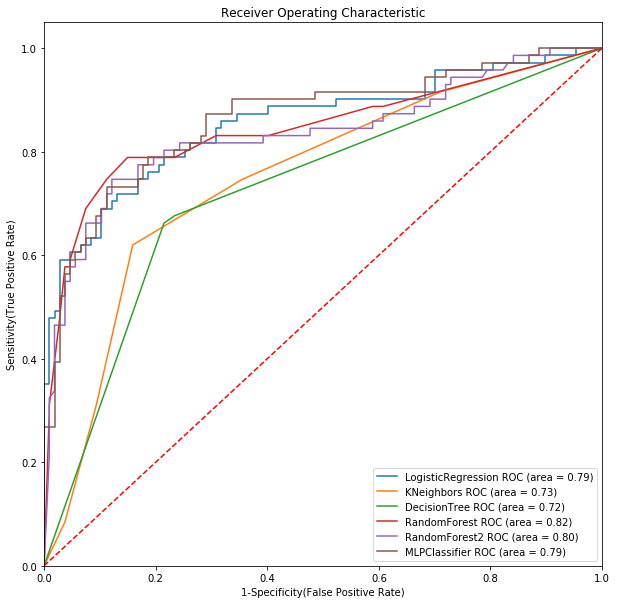

In [27]:
#create ROC chart with all Models on it

plt.figure(figsize=(10,10))

# Below for loop iterates through your models list
for name,model in models:
    model.fit(x_train, y_train.values.ravel())
    y_pred=model.predict(x_valid) # predict the test data
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = roc_curve(y_valid.values.ravel(), model.predict_proba(x_valid)[:,1])
# Calculate Area under the curve to display on the plot
    auc = roc_auc_score(y_valid.values.ravel(),model.predict(x_valid))
# Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (name, auc))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()   # Display
